### ▶Part1. 토큰화
- 문장에서 토큰으로 나눌 구분자를 이용하여 단어 분리

In [1]:
import numpy as np
txt=['파이썬 차트 파이썬 머신러닝',
      '차트 파이썬 R 차트',
       'R 분석 시각화'
      ]

In [2]:
# 빈칸 단위로 나누기
txtList=[i.split(' ') for i in txt]
txtList

[['파이썬', '차트', '파이썬', '머신러닝'], ['차트', '파이썬', 'R', '차트'], ['R', '분석', '시각화']]

### ▶Part2. 단어필드제작- 단어 unique
- 중복단어를 제거하여 고유값으로 필드를 제작
- 결과-> ['R', '머신러닝', '분석', '시각화', '차트', '파이썬']

In [3]:
wordList=[]
nouns=sorted(list(set([n for i in txtList for n in i])))

### ▶Part3. TF

In [4]:
import pandas as pd
dtm=[]
for i in txtList:
    dtm.append([])
    for j in nouns:
        dtm[-1].append(i.count(j))
tf_=pd.DataFrame(dtm, columns=nouns)

In [5]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


### ▶Part4. IDF

In [6]:
import numpy as np

D=len(tf_) #총문서수
df=tf_.astype(bool).sum()
idf=D/df

In [7]:
idf

R       1.5
머신러닝    3.0
분석      3.0
시각화     3.0
차트      1.5
파이썬     1.5
dtype: float64

### ▶ Part4. TFIDF

In [8]:
tfidf_=tf_*idf
tfidf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0.0,3.0,0.0,0.0,1.5,3.0
1,1.5,0.0,0.0,0.0,3.0,1.5
2,1.5,0.0,3.0,3.0,0.0,0.0


#  ** SKlearn 모듈 활용
### 1. TF

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tdm=cv.fit_transform(txt)

# 단어 목록 확인
feature=cv.get_feature_names_out()
#TF Matrix확인
s_tf_=pd.DataFrame(tdm.toarray(), columns=feature)
s_tf_

,머신러닝,분석,시각화,차트,파이썬
0,1,0,0,1,2
1,0,0,0,2,1
2,0,1,1,0,0


### 2. TF_IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_matrix=tfidf_vectorizer.fit_transform(txt)

#단어집합
s_tfidf_feature=tfidf_vectorizer.get_feature_names_out()

#Tf_IDF
s_tfidf_=pd.DataFrame(tfidf_matrix.toarray(),columns=s_tfidf_feature)
s_tfidf_

,머신러닝,분석,시각화,차트,파이썬
0,0.50689,0.000000,0.000000,0.385503,0.771006
1,0.00000,0.000000,0.000000,0.894427,0.447214
2,0.00000,0.707107,0.707107,0.000000,0.000000


## 단어간 상관도 계산

In [11]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [12]:
#######################################################################
### 방법1: numpy를 이용한 단어간 상관도 계산
#######################################################################
import numpy as np
import pandas as pd

word_corr=np.corrcoef(tf_,rowvar=False)
print(word_corr)

print('='*100)
vocab=tf_.columns
df=pd.DataFrame(word_corr,columns=vocab)
df.index=vocab
df

[[ 1.        -1.         0.5        0.5        0.        -0.8660254]
 [-1.         1.        -0.5       -0.5        0.         0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.5       -0.5        1.         1.        -0.8660254 -0.8660254]
 [ 0.         0.        -0.8660254 -0.8660254  1.         0.5      ]
 [-0.8660254  0.8660254 -0.8660254 -0.8660254  0.5        1.       ]]


,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


In [13]:
#######################################################################
### 방법2: pandas를 이용한 단어간 상관도 계산
#######################################################################

import pandas as pd
tf_.corr()


,R,머신러닝,분석,시각화,차트,파이썬
R,1.000000,-1.000000,0.500000,0.500000,0.000000,-0.866025
머신러닝,-1.000000,1.000000,-0.500000,-0.500000,0.000000,0.866025
분석,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
시각화,0.500000,-0.500000,1.000000,1.000000,-0.866025,-0.866025
차트,0.000000,0.000000,-0.866025,-0.866025,1.000000,0.500000
파이썬,-0.866025,0.866025,-0.866025,-0.866025,0.500000,1.000000


<AxesSubplot:>

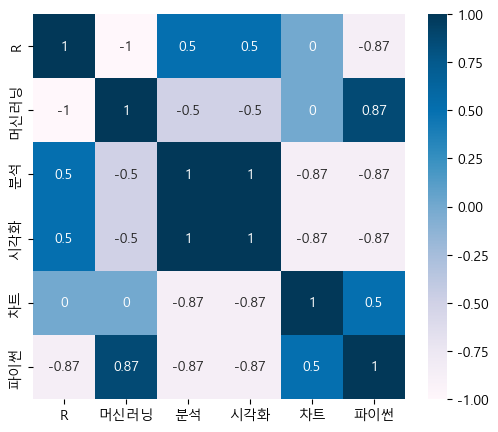

In [14]:
#################################################
#### 히트맵을 이용한 상관도 출력
#################################################
# R과 머신러닝이 -1 의 상관도임
# R이라는 글자가 나올때는 머신러닝이라는 글자가 전혀 나오지 않는다는 뜻
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
import seaborn as sns
plt.figure(figsize=(6,5))

sns.heatmap(tf_.corr(),annot=True,cmap = 'PuBu')

### 단어별 상관관계 네트워크 차트

In [15]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [16]:
### 단어의 집합별 상관계수 값 리스트화 하기

words=tf_.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))

In [17]:
edges

[('R', '머신러닝', -1.0),
 ('R', '분석', 0.4999999999999999),
 ('R', '시각화', 0.4999999999999999),
 ('R', '차트', 0.0),
 ('R', '파이썬', -0.8660254037844385),
 ('머신러닝', '분석', -0.5),
 ('머신러닝', '시각화', -0.5),
 ('머신러닝', '차트', 0.0),
 ('머신러닝', '파이썬', 0.8660254037844387),
 ('분석', '시각화', 0.9999999999999998),
 ('분석', '차트', -0.8660254037844385),
 ('분석', '파이썬', -0.8660254037844385),
 ('시각화', '차트', -0.8660254037844385),
 ('시각화', '파이썬', -0.8660254037844385),
 ('차트', '파이썬', 0.5)]

In [18]:
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)
edges 

[('분석', '시각화', 0.9999999999999998),
 ('머신러닝', '파이썬', 0.8660254037844387),
 ('차트', '파이썬', 0.5),
 ('R', '분석', 0.4999999999999999),
 ('R', '시각화', 0.4999999999999999),
 ('R', '차트', 0.0),
 ('머신러닝', '차트', 0.0),
 ('머신러닝', '분석', -0.5),
 ('머신러닝', '시각화', -0.5),
 ('R', '파이썬', -0.8660254037844385),
 ('분석', '차트', -0.8660254037844385),
 ('분석', '파이썬', -0.8660254037844385),
 ('시각화', '차트', -0.8660254037844385),
 ('시각화', '파이썬', -0.8660254037844385),
 ('R', '머신러닝', -1.0)]

In [19]:
###########################################################
#상관계수 추출 : 상관게수를 네트워크 차트의 가중치로 사용함
#############################################################
weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능
weight_list

[0.9999999999999998,
 0.8660254037844387,
 0.5,
 0.4999999999999999,
 0.4999999999999999,
 0.0,
 0.0,
 -0.5,
 -0.5,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -0.8660254037844385,
 -1.0]

In [20]:
##################################################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
#################################################
edge_list = [(word1,word2) for word1, word2, weight in edges]
edge_list

[('분석', '시각화'),
 ('머신러닝', '파이썬'),
 ('차트', '파이썬'),
 ('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('머신러닝', '차트'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('R', '파이썬'),
 ('분석', '차트'),
 ('분석', '파이썬'),
 ('시각화', '차트'),
 ('시각화', '파이썬'),
 ('R', '머신러닝')]

In [21]:
!pip install networkx

In [22]:
import networkx as nx

G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))
edge_set

{('R', '분석'),
 ('R', '시각화'),
 ('R', '차트'),
 ('R', '파이썬'),
 ('머신러닝', '분석'),
 ('머신러닝', '시각화'),
 ('머신러닝', '차트'),
 ('머신러닝', '파이썬'),
 ('분석', '시각화'),
 ('차트', '파이썬')}

In [23]:
# https://networkx.org/documentation/stable/tutorial.html
# https://95pbj.tistory.com/34   (한국어 사이트)


print('\n ▶ 노드갯수 출력')   # feature 갯수 (R, 분석, 시각화, 머신러닝, 파이썬, 차트)
print(G.number_of_nodes())

print('\n ▶노드값 출력')
print(G.nodes)

print('\n ▶ 엣지(word1,word2)값 출력')
print(G.edges)


## 디그리는 노드에서 분기하는 선의 갯수로서
# 여기서는 모든 노드와 연결되어 있음.(상관도를 모두 구함으로)
# 그래서 분석일때는 5개의 노드(n-1)개의 디그리가 생김.  분석->시각화, 분석->머신러닝, 분석->파이썬, 분석->차트, 분석-R
print('\n ▶ 디그리값 출력')  
print(G.degree)


print('\n ▶ 인접')
print(G.adj)
      
print('\n ▶ edges의 갯수')
print(G.number_of_edges())


print('\n ▶ 요약 ')
print(nx.info(G))


 ▶ 노드갯수 출력
6

 ▶노드값 출력
['분석', '시각화', '머신러닝', '파이썬', '차트', 'R']

 ▶ 엣지(word1,word2)값 출력
[('분석', '시각화'), ('분석', 'R'), ('분석', '머신러닝'), ('시각화', 'R'), ('시각화', '머신러닝'), ('머신러닝', '파이썬'), ('머신러닝', '차트'), ('파이썬', '차트'), ('파이썬', 'R'), ('차트', 'R')]

 ▶ 디그리값 출력
[('분석', 3), ('시각화', 3), ('머신러닝', 4), ('파이썬', 3), ('차트', 3), ('R', 4)]

 ▶ 인접
{'분석': {'시각화': {'weight': 0.9999999999999998}, 'R': {'weight': 0.4999999999999999}, '머신러닝': {'weight': -0.5}}, '시각화': {'분석': {'weight': 0.9999999999999998}, 'R': {'weight': 0.4999999999999999}, '머신러닝': {'weight': -0.5}}, '머신러닝': {'파이썬': {'weight': 0.8660254037844387}, '차트': {'weight': 0.0}, '분석': {'weight': -0.5}, '시각화': {'weight': -0.5}}, '파이썬': {'머신러닝': {'weight': 0.8660254037844387}, '차트': {'weight': 0.5}, 'R': {'weight': -0.8660254037844385}}, '차트': {'파이썬': {'weight': 0.5}, 'R': {'weight': 0.0}, '머신러닝': {'weight': 0.0}}, 'R': {'분석': {'weight': 0.4999999999999999}, '시각화': {'weight': 0.4999999999999999}, '차트': {'weight': 0.0}, '파이썬': {'weight': -0.86602540378443

C:\Users\hmh\AppData\Local\Temp\ipykernel_10032\3912046564.py:30: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [24]:
tmp=np.sum(tf_)
print(tmp)
print('='*100)
nsize=tmp
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

print(nsize)

R       2
머신러닝    1
분석      1
시각화     1
차트      3
파이썬     3
dtype: int64
R       1000.0
머신러닝       0.0
분석         0.0
시각화        0.0
차트      2000.0
파이썬     2000.0
dtype: float64


In [25]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


[('분석', '시각화', 0.9999999999999998), ('머신러닝', '파이썬', 0.8660254037844387), ('차트', '파이썬', 0.5), ('R', '분석', 0.4999999999999999), ('R', '시각화', 0.4999999999999999), ('R', '차트', 0.0), ('머신러닝', '차트', 0.0), ('머신러닝', '분석', -0.5), ('머신러닝', '시각화', -0.5), ('R', '파이썬', -0.8660254037844385)]


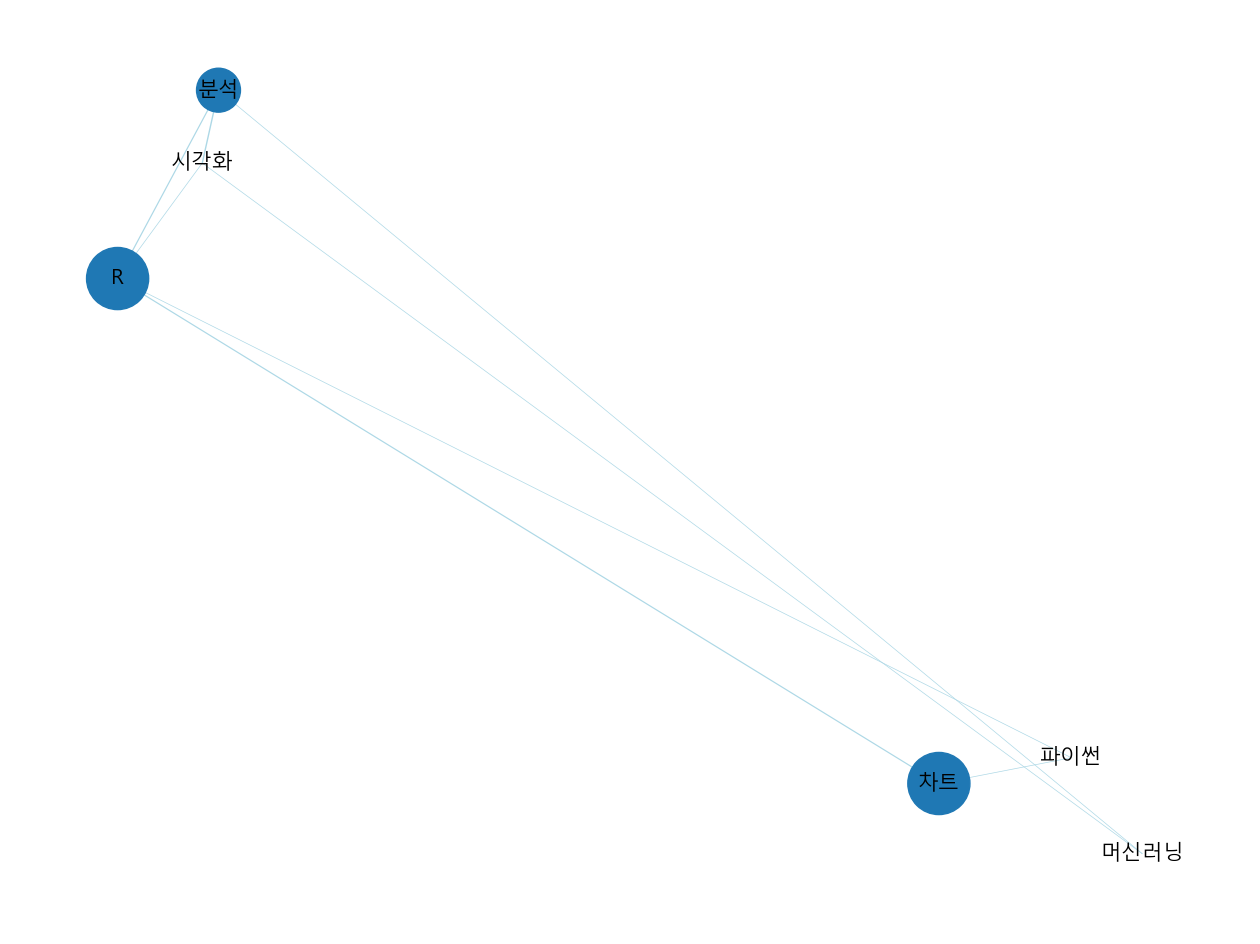

In [26]:
###############################
### 상관계수 시각화
## 그래프를  그리기 위해서 준비해야 하는건
## 몇개의 노드를 준비할지,
# 그 노드에서 몇개의 디그리가 나올지
# 그리고 엣지(노드와 노드의 쌍)별 거리는 무엇으로 할지.
##############################

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(16,12)); plt.axis('off')

fname = fm.FontProperties().get_name()


print(edges[:rank])
nx.draw_networkx(G, with_labels = True,
                 font_family=fname,width=weight_list[:rank],edge_color='lightblue',font_size=15,
                 node_size=nsize)   # 상관관계값이 높을수록 가깝게 표시됨

# nx.draw_networkx(G,node_size=nsize,
#                  alpha=0.5, edge_color='0.1', #cmap=plt.cm.YlGn,
#                  font_family=fname,font_size=15)

### <수정>

In [27]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [30]:
# 노드size: 단어빈도수(TF)
nsize

R       1000.0
머신러닝       0.0
분석         0.0
시각화        0.0
차트      2000.0
파이썬     2000.0
dtype: float64

In [32]:
# 노드 degree 확인 : degree 키값으로 node그려짐..따라서...degree 키값 기반으로 size 재 조정함
G.degree

DegreeView({'분석': 3, '시각화': 3, '머신러닝': 4, '파이썬': 3, '차트': 3, 'R': 4})

In [40]:
temp={k:nsize[k] for k in dict(G.degree)}
temp

{'분석': 0.0, '시각화': 0.0, '머신러닝': 0.0, '파이썬': 2000.0, '차트': 2000.0, 'R': 1000.0}

In [41]:
nsize=[nsize[k] for k in dict(G.degree)]


In [42]:
nsize

[0.0, 0.0, 0.0, 2000.0, 2000.0, 1000.0]

[('분석', '시각화', 0.9999999999999998), ('머신러닝', '파이썬', 0.8660254037844387), ('차트', '파이썬', 0.5), ('R', '분석', 0.4999999999999999), ('R', '시각화', 0.4999999999999999), ('R', '차트', 0.0), ('머신러닝', '차트', 0.0), ('머신러닝', '분석', -0.5), ('머신러닝', '시각화', -0.5), ('R', '파이썬', -0.8660254037844385)]


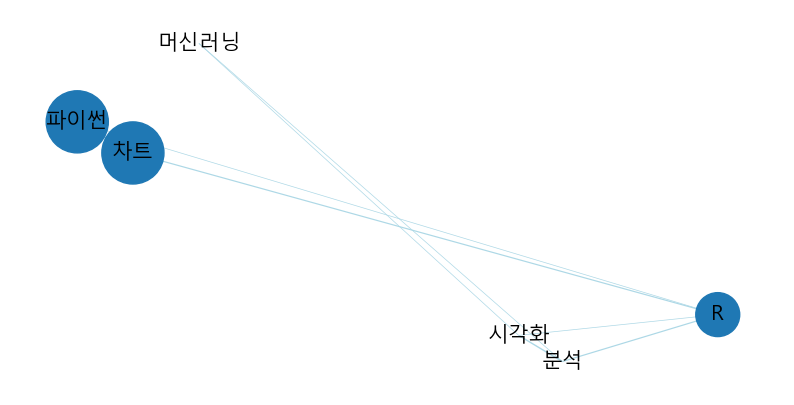

In [46]:
###############################
### 상관계수 시각화
## 그래프를  그리기 위해서 준비해야 하는건
## 몇개의 노드를 준비할지,
# 그 노드에서 몇개의 디그리가 나올지
# 그리고 엣지(노드와 노드의 쌍)별 거리는 무엇으로 할지.
##############################

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(10,5)); plt.axis('off')

fname = fm.FontProperties().get_name()


print(edges[:rank])
nx.draw_networkx(G, with_labels = True,
                 font_family=fname,width=weight_list[:rank],edge_color='lightblue',font_size=15,
                 node_size=nsize)   # 상관관계값이 높을수록 가깝게 표시됨